In [161]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

In [364]:
#load data from Brazilian stock exchange market IBOVESPA
tickers = ["^BVSP", "USDBRL=x"]
cotacoes = web.get_data_yahoo(tickers)["Close"]
cotacoes = cotacoes.rename(columns = {'^BVSP': 'IBOV','USDBRL=x': 'DOLAR'}, inplace = False)
cotacoes.head()

Symbols,IBOV,DOLAR
Date,,
2016-11-09,63258.0,3.1681
2016-11-10,61201.0,3.2330
2016-11-11,59184.0,3.3956
2016-11-14,59657.0,3.3900
2016-11-15,NaN,3.4403


In [365]:
#check missing data in dolar exchange rate and ibovespa index columns
cotCol = cotacoes['DOLAR'].shape
ibovCol = cotacoes['IBOV'].shape

print("Missing percentage of DOLAR data  {:.2f}%.".format(100*(cotacoes['DOLAR'].isnull().sum()/cotCol[0])))      
print("Missing percentage of IBOV data {:.2f}%.".format(100*(cotacoes['IBOV'].isnull().sum()/ibovCol[0])))

Missing percentage of DOLAR data  10.09%.
Missing percentage of IBOV data 14.93%.


In [366]:
#visualization of missing data
sns.set_theme(style="whitegrid")
cotacoes.plot(subplots=True, figsize=(16, 8))
plt.show()

In [368]:
cotacoes.head()

Symbols,IBOV,DOLAR
Date,,
2016-11-09,63258.0,3.1681
2016-11-10,61201.0,3.2330
2016-11-11,59184.0,3.3956
2016-11-14,59657.0,3.3900
2016-11-15,NaN,3.4403


In [388]:
cotacoes['DOLAR'] = np.where(cotacoes['DOLAR'] == 0, np.nan, cotacoes['DOLAR'])
cotacoes['DOLAR'] = cotacoes.DOLAR.interpolate()

In [389]:
cotacoes['IBOV'] = np.where(cotacoes['IBOV'] == 0, np.nan, cotacoes['IBOV'])
cotacoes['IBOV'] = cotacoes.IBOV.interpolate()

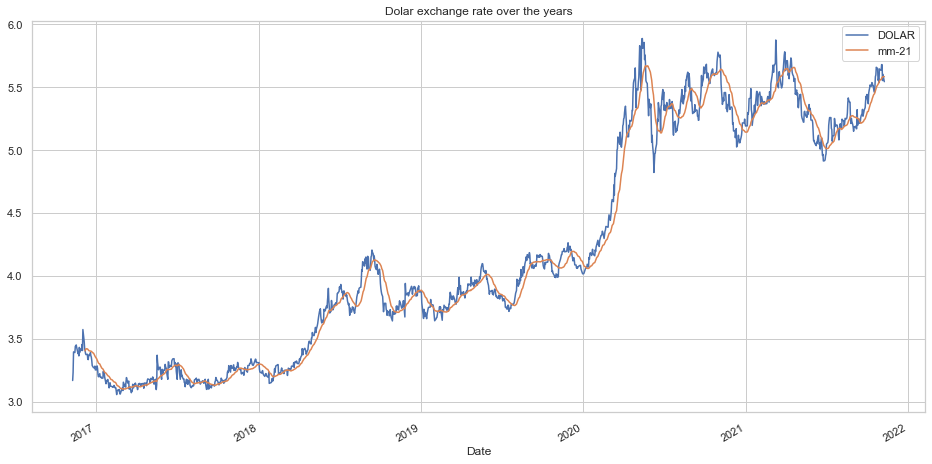

In [393]:
sns.set_theme(style="whitegrid")
cotacoes['DOLAR'].plot(subplots=False, figsize=(16, 8))
cotacoes['DOLAR'].rolling(21).mean().plot(label="mm-21")
# Legendas
plt.legend()
plt.title('Dolar exchange rate over the years')
plt.show()

In [377]:
cple6 = web.get_data_yahoo('CPLE6.sa')
cple6.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-09,3.575,3.480,3.500,3.514,6225000.0,2.238741
2016-11-10,3.555,3.222,3.516,3.253,10768000.0,2.072460
2016-11-11,3.219,2.759,3.200,2.851,17942000.0,1.816350
2016-11-14,2.948,2.761,2.850,2.777,8627000.0,1.769204
2016-11-16,2.914,2.770,2.778,2.914,13357000.0,1.856486


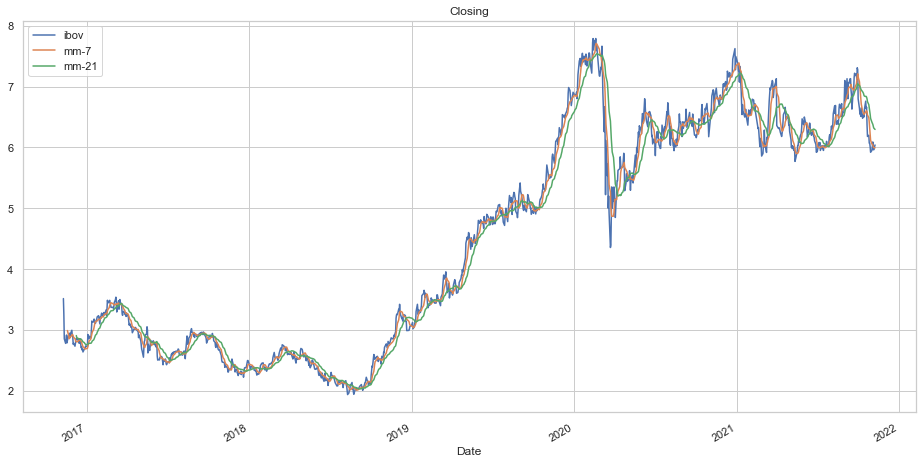

In [380]:
sns.set_theme(style="whitegrid")
# Preço de fechamento
cple6["Close"].plot(figsize=(16, 8), label="ibov")
# Média móvel 21 dias
cple6["Close"].rolling(7).mean().plot(label="mm-7")
# Média móvel 200 dias
cple6["Close"].rolling(21).mean().plot(label="mm-21")
# Legendas
plt.title('Closing')
plt.legend()
plt.show()

In [292]:
petr4 = web.get_data_yahoo('petr4.sa')
petr4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-09,17.10,15.81,15.85,16.65,111417100.0,14.103325
2016-11-10,17.18,15.50,17.10,15.50,94683900.0,13.129222
2016-11-11,15.46,13.94,15.18,14.01,129811400.0,11.867123
2016-11-14,14.18,13.33,13.80,14.00,86623000.0,11.858650
2016-11-16,14.96,14.18,14.55,14.74,77406600.0,12.485466


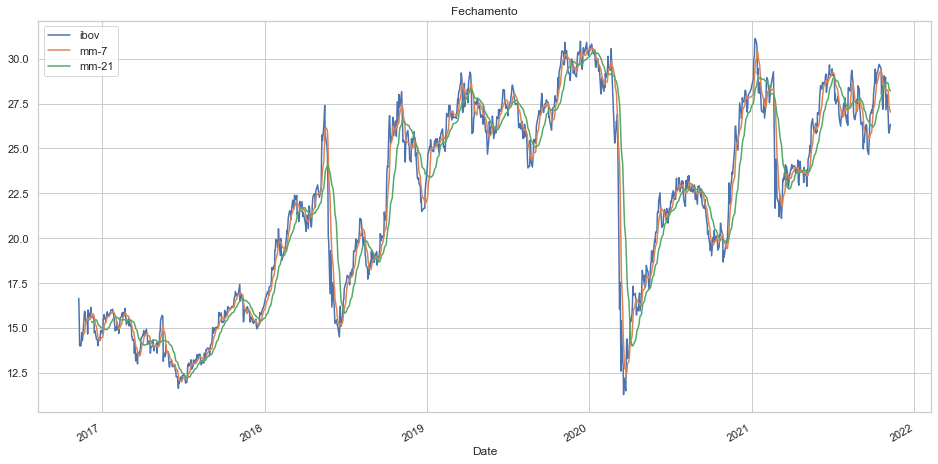

In [381]:
sns.set_theme(style="whitegrid")
# Preço de fechamento
petr4["Close"].plot(figsize=(16, 8), label="ibov")
# Média móvel 21 dias
petr4["Close"].rolling(7).mean().plot(label="mm-7")
# Média móvel 50 dias
petr4["Close"].rolling(21).mean().plot(label="mm-21")
# Legendas
plt.title('Fechamento')
plt.legend()
plt.show()

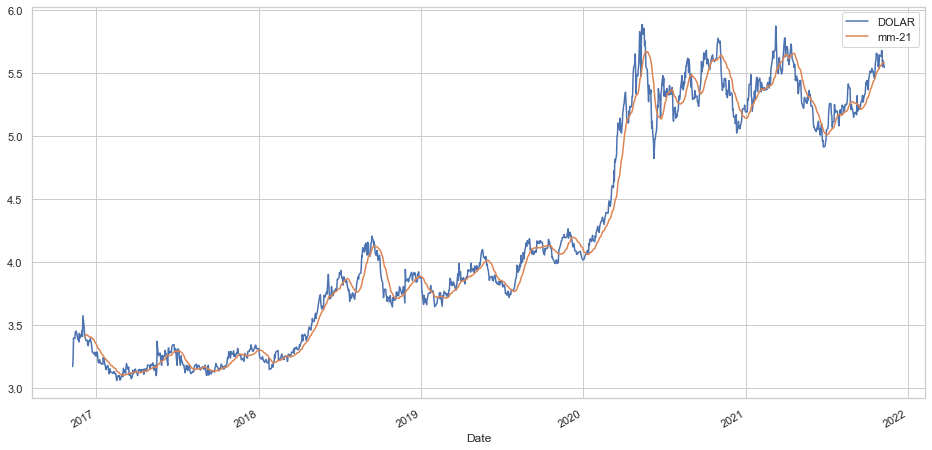

In [382]:
sns.set_theme(style="whitegrid")
cotacoes['DOLAR'].plot(subplots=False, figsize=(16, 8))
cotacoes['DOLAR'].rolling(21).mean().plot(label="mm-21")
# Legendas
plt.legend()
plt.show()

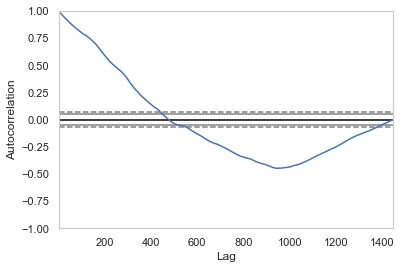

In [384]:
 _ = autocorrelation_plot(cotacoes['DOLAR'])

In [385]:
cotacoes2 = cotacoes.reset_index()

In [386]:
cotacoes2 = cotacoes2[(cotacoes2['Date'] > '2021-1-1')]

Test RMSE: 0.047


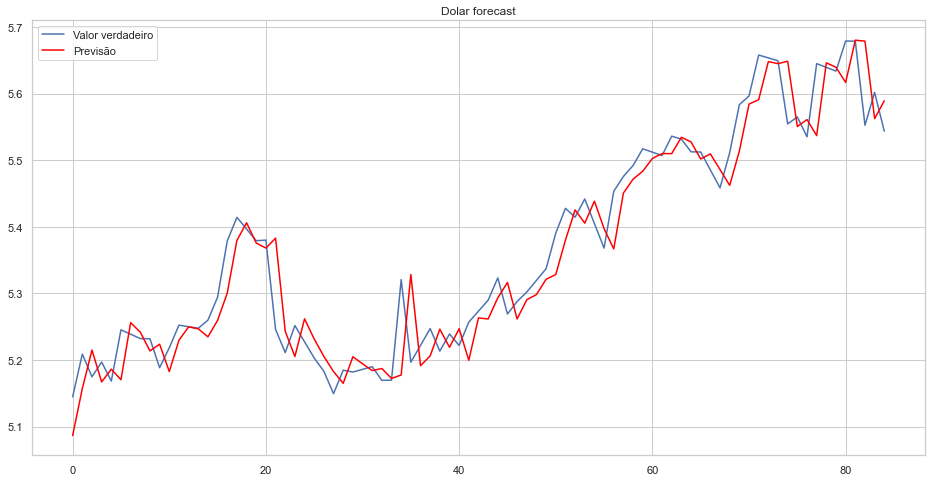

In [387]:
# split into train and test sets
X = cotacoes2['DOLAR'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(16, 8))
plt.plot(test, label='Valor verdadeiro')
plt.plot(predictions, color='red', label = 'Previsão')
plt.legend()
plt.title('Dolar forecast')
plt.show()

In [329]:
cotacoes2['Date']

1197   2021-01-04
1198   2021-01-05
1199   2021-01-06
1200   2021-01-07
1201   2021-01-08
          ...    
1442   2021-11-02
1443   2021-11-03
1444   2021-11-04
1445   2021-11-05
1446   2021-11-08
Name: Date, Length: 250, dtype: datetime64[ns]

In [358]:
a = cotacoes2[(cotacoes2['Date'] > '2021-7-29')]

In [362]:
len(test)

85

In [361]:
a['Date']

1362   2021-07-30
1363   2021-08-01
1364   2021-08-02
1365   2021-08-03
1366   2021-08-04
          ...    
1442   2021-11-02
1443   2021-11-03
1444   2021-11-04
1445   2021-11-05
1446   2021-11-08
Name: Date, Length: 85, dtype: datetime64[ns]